In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data('/Users/ellen/GitHub/DeepLearningProjects/dataset/mnist.npz')

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [6]:
X_train.shape

(60000, 28, 28, 1)

In [7]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [8]:
y_train_cat.shape

(60000, 10)

In [9]:
y_train_cat[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

In [10]:
from keras.layers import MaxPool2D, AvgPool2D
from keras.layers import Flatten, Activation
from keras.layers import Conv2D

from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K

In [28]:
K.clear_session()

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop', 
              metrics=['accuracy'])

In [29]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [30]:
h = model.fit(X_train, y_train_cat, batch_size=128,
          epochs=2, verbose=1, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/2
48000/48000 [==============================] - 28s - loss: 10.1142 - acc: 0.3699 - val_loss: 8.6327 - val_acc: 0.4613
Epoch 2/2
48000/48000 [==============================] - 26s - loss: 5.9257 - acc: 0.6241 - val_loss: 3.4631 - val_acc: 0.7760


In [22]:
model.evaluate(X_test, y_test_cat)

10000/10000 [==============================] - 2s     


[5.2915203002929685, 0.66459999999999997]

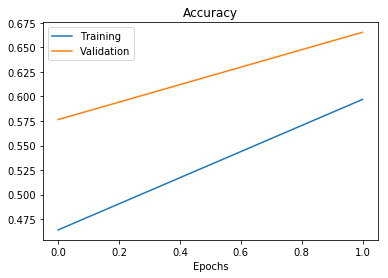

In [25]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
# plt.plot(h.history['test_acc'])

plt.legend(['Training', 'Validation','Test'])
plt.title('Accuracy')
plt.xlabel('Epochs')